<a href="https://colab.research.google.com/github/esmanurarslan/4th_grade_hw/blob/main/content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_colwidth', None)

# Tüm satırları yazdırmak için pandas ayarlarını değiştiriyoruz
pd.set_option('display.max_rows', None)  # Tüm satırları göster
pd.set_option('display.max_columns', None)  # Tüm sütunları göster

**Import dataset and inspection**

In [ ]:
# reading the movies dataset
movies = pd.read_csv('/content/drive/MyDrive/Data_Mining/movielens/movies.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(9742, 3)

In [ ]:
# reading the ratings dataset
ratings = pd.read_csv('/content/drive/MyDrive/Data_Mining/movielens/ratings.csv')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Data Cleaning**

In [ ]:
# 'timestamp' kolonunu silme
ratings = ratings.drop(columns=["timestamp"])

In [ ]:
ratings.shape

(100836, 3)

In [ ]:
movies_ratings = pd.merge(movies, ratings, on='movieId')
movies_ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [ ]:
movies_ratings.shape

(100836, 5)

In [ ]:
movies_ratings = movies_ratings[['userId','movieId', 'title', 'genres', 'rating']]
# sort the dataframe according to 'userId' and then 'movieId'
movies_ratings.sort_values(['userId','movieId'], inplace=True)

In [ ]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100836 entries, 0 to 100411
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   title    100836 non-null  object 
 3   genres   100836 non-null  object 
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [ ]:
movies_ratings.head()

,userId,movieId,title,genres,rating
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
325,1,3,Grumpier Old Men (1995),Comedy|Romance,4.0
433,1,6,Heat (1995),Action|Crime|Thriller,4.0
2107,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0
2379,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0


In [ ]:
# removing the extra whitespaces(if any) from the column 'title' and 'genres'
movies_ratings['title'] = movies_ratings['title'].str.strip()
movies_ratings['genres'] = movies_ratings['genres'].str.strip()


In [ ]:
movies_ratings.isnull().sum()

,0
userId,0
movieId,0
title,0
genres,0
rating,0


In [ ]:
# 'genres' kolonundaki değerleri ayır ve teker teker al
unique_genres = movies_ratings['genres'].str.split('|').explode().unique()

# Benzersiz türleri liste halinde göster
print(unique_genres)

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Action'
 'Crime' 'Thriller' 'Mystery' 'Horror' 'Drama' 'War' 'Western' 'Sci-Fi'
 'Musical' 'Film-Noir' 'IMAX' 'Documentary' '(no genres listed)']


In [ ]:
# "(no genres listed)" değerlerinin sayısını bulma
no_genres_count = movies_ratings[movies_ratings['genres'] == '(no genres listed)'].shape[0]

print(f"(no genres listed) değeri {no_genres_count} kez bulunuyor.")


(no genres listed) değeri 47 kez bulunuyor.


In [ ]:
# genres değeri '(no genres listed)' olan satırları silme
movies_ratings = movies_ratings[movies_ratings['genres'] != '(no genres listed)']

In [ ]:
# title değerine göre gruplama yapıp birden fazla movieId'ye sahip olanları filtreleyelim
duplicates = movies_ratings.groupby('title').filter(lambda x: len(x['movieId'].unique()) > 1)

# title ve movieId sütunlarını seçelim
duplicates = duplicates[['title', 'movieId']]

# Aynı title'lara sahip fakat farklı movieId'lere sahip olanları yazdırma
print(duplicates.sort_values('title'))



                                         title  movieId
69626   Confessions of a Dangerous Mind (2002)     6003
69630   Confessions of a Dangerous Mind (2002)     6003
69635   Confessions of a Dangerous Mind (2002)     6003
99483   Confessions of a Dangerous Mind (2002)   144606
69625   Confessions of a Dangerous Mind (2002)     6003
69634   Confessions of a Dangerous Mind (2002)     6003
69632   Confessions of a Dangerous Mind (2002)     6003
69627   Confessions of a Dangerous Mind (2002)     6003
69636   Confessions of a Dangerous Mind (2002)     6003
69637   Confessions of a Dangerous Mind (2002)     6003
69631   Confessions of a Dangerous Mind (2002)     6003
69628   Confessions of a Dangerous Mind (2002)     6003
69639   Confessions of a Dangerous Mind (2002)     6003
69633   Confessions of a Dangerous Mind (2002)     6003
69638   Confessions of a Dangerous Mind (2002)     6003
69629   Confessions of a Dangerous Mind (2002)     6003
19681                              Emma (1996)  

In [ ]:
# Öncelikle duplicate olan title'lar için en çok tekrar eden movieId'yi bulmamız gerekiyor.
# `title` için gruplama yapıp, her gruptaki en fazla tekrar eden `movieId`'yi alacağız.
most_frequent_movieIds = movies_ratings.groupby('title')['movieId'].agg(lambda x: x.mode()[0])

# Şimdi, duplicate olan `title` değerlerini en sık tekrar eden `movieId` ile güncelleyeceğiz.
def update_movieId(row):
    return most_frequent_movieIds[row['title']]

movies_ratings['movieId'] = movies_ratings.apply(update_movieId, axis=1)

In [ ]:
# Sonuçları kontrol etmek için:
print(movies_ratings[movies_ratings['title'] == 'Emma (1996)'])

       userId  movieId        title                genres  rating
19668       6      838  Emma (1996)  Comedy|Drama|Romance     4.0
19669      12      838  Emma (1996)  Comedy|Drama|Romance     5.0
19670      33      838  Emma (1996)  Comedy|Drama|Romance     5.0
19671      57      838  Emma (1996)  Comedy|Drama|Romance     3.0
19672      68      838  Emma (1996)  Comedy|Drama|Romance     3.5
19673      84      838  Emma (1996)  Comedy|Drama|Romance     5.0
19674     100      838  Emma (1996)  Comedy|Drama|Romance     4.5
19675     104      838  Emma (1996)  Comedy|Drama|Romance     4.0
19676     108      838  Emma (1996)  Comedy|Drama|Romance     5.0
19677     113      838  Emma (1996)  Comedy|Drama|Romance     4.0
19678     132      838  Emma (1996)  Comedy|Drama|Romance     2.0
19679     156      838  Emma (1996)  Comedy|Drama|Romance     3.0
19680     206      838  Emma (1996)  Comedy|Drama|Romance     5.0
19681     246      838  Emma (1996)  Comedy|Drama|Romance     4.0
19682     

**Encoding**

In [ ]:
# df deki genresleri kolon yap, olana 1 olmayana 0
for genre in unique_genres:
    movies_ratings[genre] = movies_ratings['genres'].apply(lambda x: 1 if genre in x else 0)

In [ ]:
movies_ratings.head()

,userId,movieId,title,genres,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
325,1,3,Grumpier Old Men (1995),Comedy|Romance,4.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
433,1,6,Heat (1995),Action|Crime|Thriller,4.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2107,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2379,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


**Visualization**

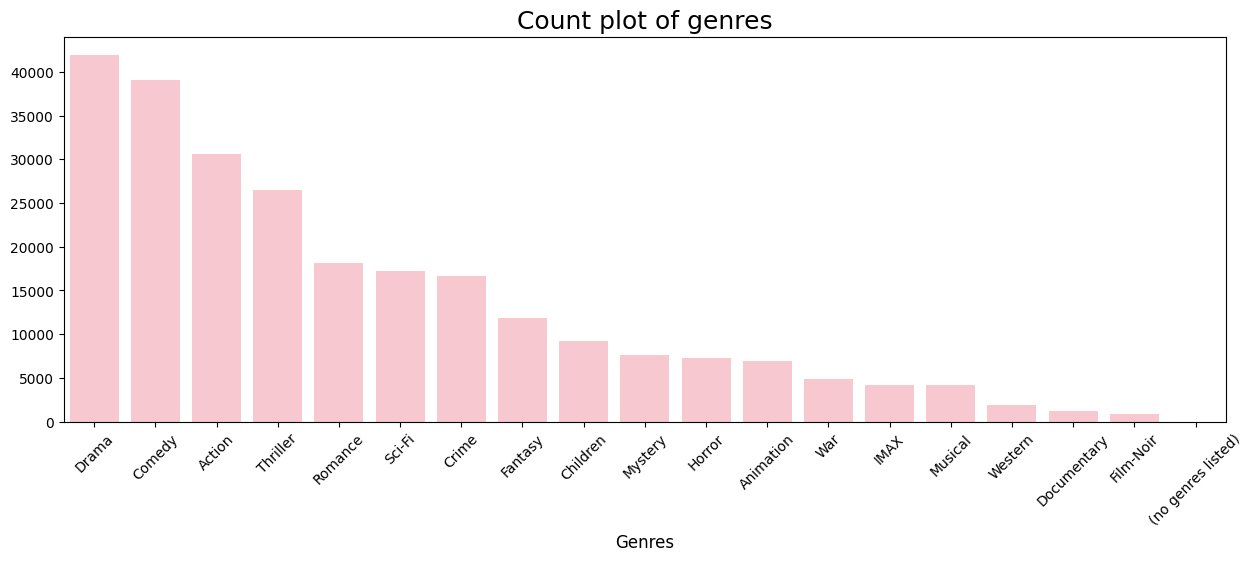

In [ ]:
genres_count = movies_ratings.iloc[:,6:].sum(axis=0).reset_index().rename(columns={'index':'genre',0:'count'})
genres_count.sort_values('count',ascending=False, inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(x = genres_count['genre'], y=genres_count['count'], color='pink')
plt.xticks(rotation=45)
plt.xlabel('Genres', size=12)
plt.ylabel('')
plt.title('Count plot of genres', size=18, color='black')
plt.show()

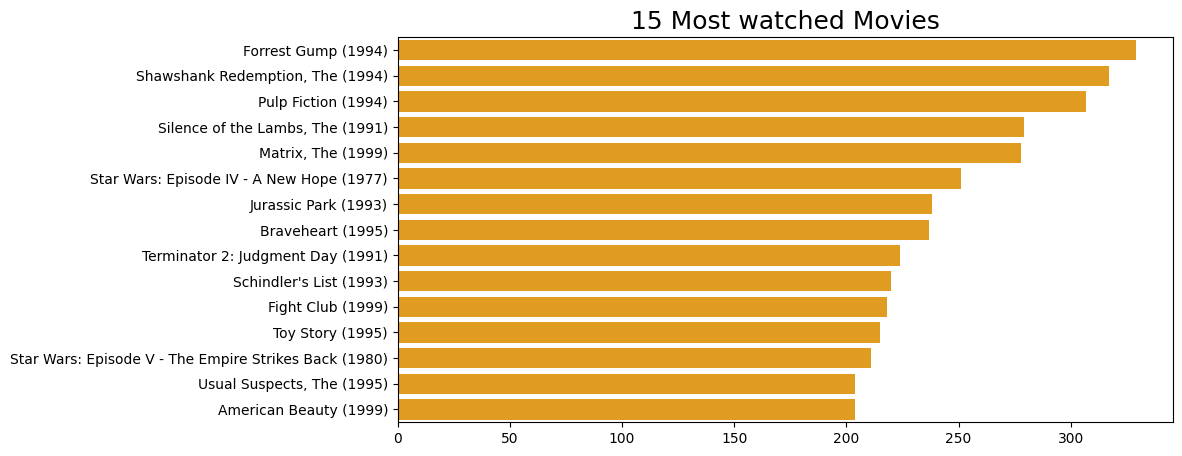

In [ ]:
mr = movies_ratings.groupby('title')['title'].count().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(y = mr.index, x=mr.values, color='orange')
plt.ylabel('')
plt.title('15 Most watched Movies', size=18, color='black')
plt.show()

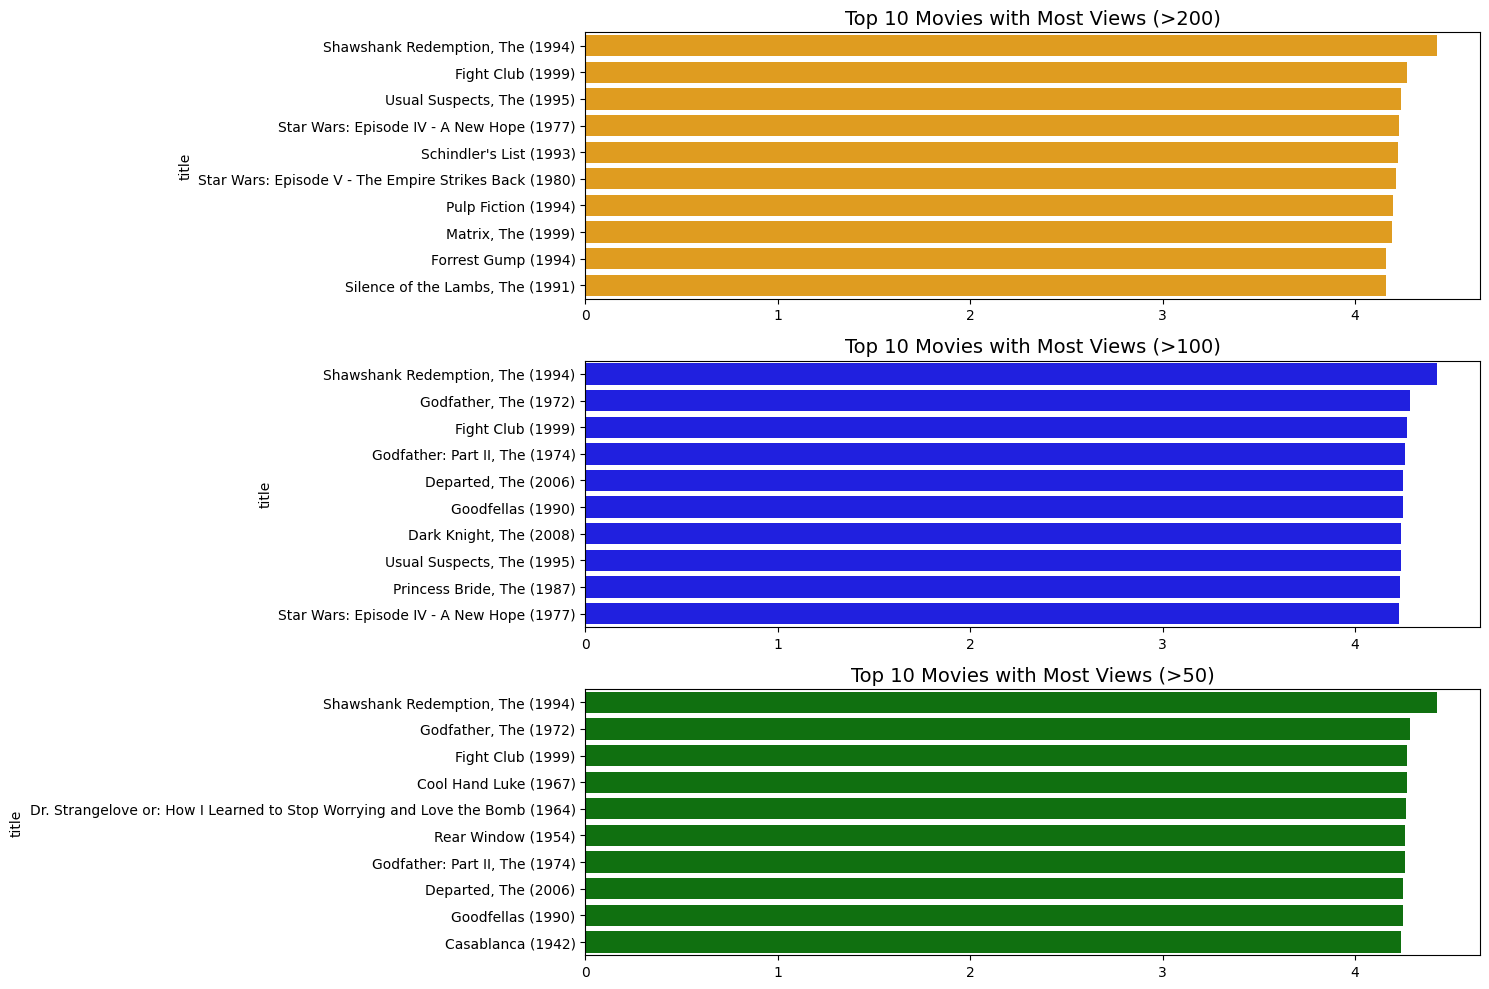

In [ ]:
# 200'den fazla kişi tarafından izlenen filmler
movies_200 = movies_ratings.groupby('title').filter(lambda x: len(x) > 200)

# Ortalama puanı hesaplama
avg_ratings_200 = movies_200.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

# 100'den fazla kişi tarafından izlenen filmler
movies_100 = movies_ratings.groupby('title').filter(lambda x: len(x) > 100)

# Ortalama puanı hesaplama
avg_ratings_100 = movies_100.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

# 50'den fazla kişi tarafından izlenen filmler
movies_50 = movies_ratings.groupby('title').filter(lambda x: len(x) > 50)

# Ortalama puanı hesaplama
avg_ratings_50 = movies_50.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

# Grafik çizme
plt.figure(figsize=(15, 10))

# 200+ izlenme
plt.subplot(3, 1, 1)
sns.barplot(y=avg_ratings_200.index, x=avg_ratings_200.values, color='orange')
plt.title('Top 10 Movies with Most Views (>200)', fontsize=14)

# 100+ izlenme
plt.subplot(3, 1, 2)
sns.barplot(y=avg_ratings_100.index, x=avg_ratings_100.values, color='blue')
plt.title('Top 10 Movies with Most Views (>100)', fontsize=14)

# 50+ izlenme
plt.subplot(3, 1, 3)
sns.barplot(y=avg_ratings_50.index, x=avg_ratings_50.values, color='green')
plt.title('Top 10 Movies with Most Views (>50)', fontsize=14)

# Grafik düzenlemeleri
plt.tight_layout()
plt.show()

**Content-based Filtering**

In [ ]:
# consider only user with id=1 and subset its data from main dataframe to another dataframe

user_10 = movies_ratings[movies_ratings['userId']==10]
user_10.head()

,userId,movieId,title,genres,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
7865,10,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
10023,10,356,Forrest Gump (1994),Comedy|Drama|Romance|War,3.5,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
15472,10,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,4.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16793,10,597,Pretty Woman (1990),Comedy|Romance,3.5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20584,10,912,Casablanca (1942),Drama|Romance,4.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
user_10.shape

(140, 25)

In [ ]:
#ratings
user10_ratings=user_10['rating']

In [ ]:
user10_ratings.shape

(140,)

In [ ]:
#split genres section for user10,all rows, from 6th columns to end of table

movie_matrix = user_10.iloc[:,5:]
movie_matrix.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
7865,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
10023,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
15472,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16793,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20584,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# rate * genres
weighted_genre_matrix = movie_matrix.multiply(user10_ratings, axis=0)
weighted_genre_matrix.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
7865,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10023,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15472,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
16793,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20584,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
weighted_genre_matrix = pd.concat((user_10.iloc[:,:5], weighted_genre_matrix), axis=1)
weighted_genre_matrix.head()

,userId,movieId,title,genres,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
7865,10,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10023,10,356,Forrest Gump (1994),Comedy|Drama|Romance|War,3.5,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15472,10,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
16793,10,597,Pretty Woman (1990),Comedy|Romance,3.5,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20584,10,912,Casablanca (1942),Drama|Romance,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#each genres weight

wg = weighted_genre_matrix.iloc[:,5:].sum(axis=0)/weighted_genre_matrix.iloc[:,5:].sum(axis=0).sum()
wg

,0
Adventure,0.084091
Animation,0.043939
Children,0.038258
Comedy,0.195455
Fantasy,0.044318
Romance,0.196970
Action,0.068939
Crime,0.030682
Thriller,0.030303
Mystery,0.004924


In [ ]:
# number of movies watched by the user is 140
# we store all those movies id in m
m = movies_ratings[movies_ratings['userId']==10]['movieId'].values
m = set(m)
len(m)

140

In [ ]:
# total number of movies in the data is 9685
# we store all the movie ids in b
b = movies_ratings.movieId.unique()
b = set(b)
len(b)

9685

In [ ]:
# subtracting the watched movies from total movies
# 'r' is a set of movie ids which the user_10 didn't watch
r = b-m
r = list(r)
len(r)

9545

In [ ]:
# all the data except of user_1
other_users = movies_ratings[movies_ratings['userId'] != 10]
other_users.head()

,userId,movieId,title,genres,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
325,1,3,Grumpier Old Men (1995),Comedy|Romance,4.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
433,1,6,Heat (1995),Action|Crime|Thriller,4.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2107,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2379,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# keeping only those movies which user has not seen
other_users = other_users[other_users['movieId'].isin(r)]

In [ ]:
other_users.shape

(93781, 25)

In [ ]:
# storing it in 'movie_matrix_other'
movies_matrix_other = other_users.copy()
movies_matrix_other = movies_matrix_other.drop(['userId','rating'], axis=1)
movies_matrix_other.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
325,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
433,6,Heat (1995),Action|Crime|Thriller,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2107,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2379,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_matrix_other.shape

(93781, 23)

In [ ]:
#sadece izlemediği flmlerin content değerleri kalıyor
# removing the duplicate rows of the movies
movies_matrix_other = movies_matrix_other.drop_duplicates()
movies_matrix_other.shape

(9550, 23)

In [ ]:
movies_matrix_other.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
325,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
433,6,Heat (1995),Action|Crime|Thriller,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2107,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2379,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#genre weighted * films genres
weighted_movies_matrix_other = pd.concat((movies_matrix_other.iloc[:,:3], movies_matrix_other.iloc[:,3:].multiply(wg)), axis=1)
weighted_movies_matrix_other.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.084091,0.043939,0.038258,0.195455,0.044318,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,3,Grumpier Old Men (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.195455,0.000000,0.19697,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
433,6,Heat (1995),Action|Crime|Thriller,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.068939,0.030682,0.030303,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2107,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.030303,0.004924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2379,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.030682,0.030303,0.004924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
weighted_movies_matrix_other["final_score"] = weighted_movies_matrix_other.iloc[:,3:].sum(axis=1)
weighted_movies_matrix_other.sort_values('final_score', ascending=False, inplace=True)

In [ ]:
topMovie = weighted_movies_matrix_other
topMovie.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed),final_score
64460,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,0.084091,0.000000,0.000000,0.195455,0.0,0.19697,0.068939,0.000000,0.030303,0.0,0.0,0.17197,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.747727
63199,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Thriller,0.000000,0.043939,0.000000,0.195455,0.0,0.19697,0.068939,0.030682,0.030303,0.0,0.0,0.17197,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.738258
96593,108540,Ernest & Célestine (Ernest et Célestine) (2012),Adventure|Animation|Children|Comedy|Drama|Romance,0.084091,0.043939,0.038258,0.195455,0.0,0.19697,0.000000,0.000000,0.000000,0.0,0.0,0.17197,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730682
78059,26236,"White Sun of the Desert, The (Beloe solntse pustyni) (1970)",Action|Adventure|Comedy|Drama|Romance|War,0.084091,0.000000,0.000000,0.195455,0.0,0.19697,0.068939,0.000000,0.000000,0.0,0.0,0.17197,0.011364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.728788
81667,42015,Casanova (2005),Action|Adventure|Comedy|Drama|Romance,0.084091,0.000000,0.000000,0.195455,0.0,0.19697,0.068939,0.000000,0.000000,0.0,0.0,0.17197,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.717424


In [ ]:
list(topMovie[topMovie["genres"].str.contains("|")]["title"].head(10))

['Stunt Man, The (1980)',
 'Osmosis Jones (2001)',
 'Ernest & Célestine (Ernest et Célestine) (2012)',
 'White Sun of the Desert, The (Beloe solntse pustyni) (1970)',
 'Casanova (2005)',
 'Click (2006)',
 'Beat the Devil (1953)',
 'Sisterhood of the Traveling Pants 2, The (2008)',
 'Feast (2014)',
 'Ghost (1990)']